In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from scipy.ndimage.interpolation import shift
%matplotlib inline

In [2]:
# read the data file
fileName="Data.txt"
#electrode1,electrode2 = np.loadtxt(filename, delimiter=" ")
def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

electrode1,electrode2 = Read_Two_Column_File(fileName)
samplingRate= 24414

In [7]:
#Let's visualize the electrodes readings 
print('length of electrode1 list',len(electrode1))
print('length of electrode2 list',len(electrode2))

length of electrode1 list 4417524
length of electrode2 list 4417524


Text(0.5,1,'electrode2')

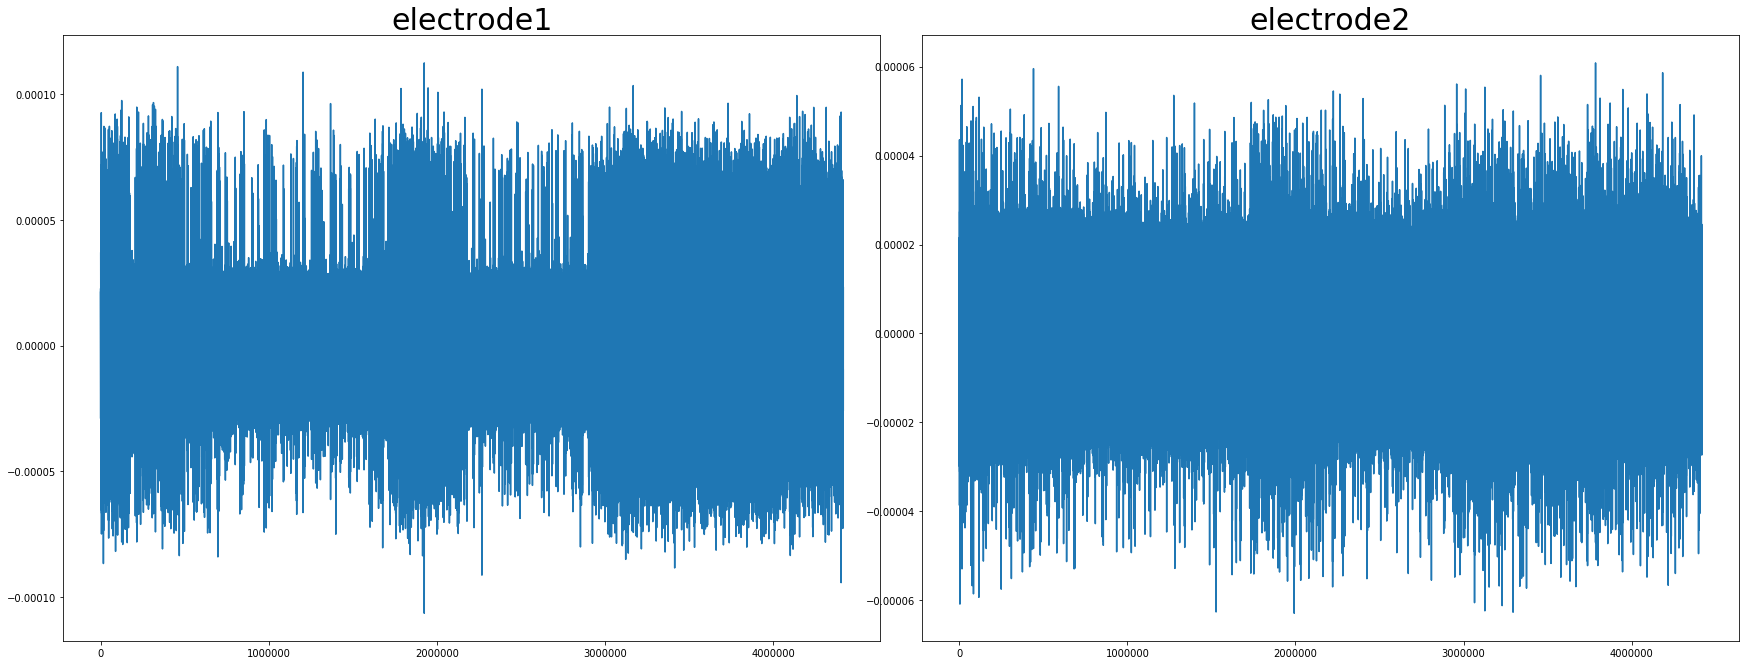

In [8]:
x_values = range(0,len(electrode1))
f1, (ax1,ax2)=plt.subplots(1,2,figsize=(24,9))
f1.tight_layout()

ax1.plot(x_values,electrode1)
ax1.set_title('electrode1',fontsize=30)

ax2.plot(x_values,electrode2)
ax2.set_title('electrode2',fontsize=30)

In [13]:
electrode1Abs= np.absolute(electrode1)
electrode2Abs= np.absolute(electrode2)

"""
f2, (ax3,ax4)=plt.subplots(1,2,figsize=(24,9))
f2.tight_layout()

ax3.plot(x_values,electrode1)
ax3.set_title('electrode1 absolute',fontsize=30)

ax4.plot(x_values,electrode2)
ax4.set_title('electrode2 absolute',fontsize=30)
"""

"\nf2, (ax3,ax4)=plt.subplots(1,2,figsize=(24,9))\nf2.tight_layout()\n\nax3.plot(x_values,electrode1)\nax3.set_title('electrode1 absolute',fontsize=30)\n\nax4.plot(x_values,electrode2)\nax4.set_title('electrode2 absolute',fontsize=30)\n"

In [4]:
sd1 = np.std(electrode1[:500])
sd2 = np.std(electrode2[:500])
print('SD',sd1,sd2)

thresh1, thresh2=sd1*3.5 ,sd2*3.5
print('THRESHOLDS ',thresh1, thresh2)

SD 8.6320170836e-06 7.59626522184e-06
THRESHOLDS  3.02120597926e-05 2.65869282764e-05


In [11]:
#Saving in file trial
np.save('electrode1Abs.txt', electrode1Abs)
np.save('electrode2Abs.txt', electrode2Abs)

In [12]:



#YOMNA YOU DON'T HAVE TO DO ANY OF THE ABOVE PROCESSING AGAIN PLEASE 
electrode1Abs=np.load('/media/yomnaj/New Volume/Bio_Assignment_2/electrode1Abs.txt.npy')
electrode2Abs=np.load('/media/yomnaj/New Volume/Bio_Assignment_2/electrode2Abs.txt.npy')

(4417524,)


Text(0.5,1,'electrode2')

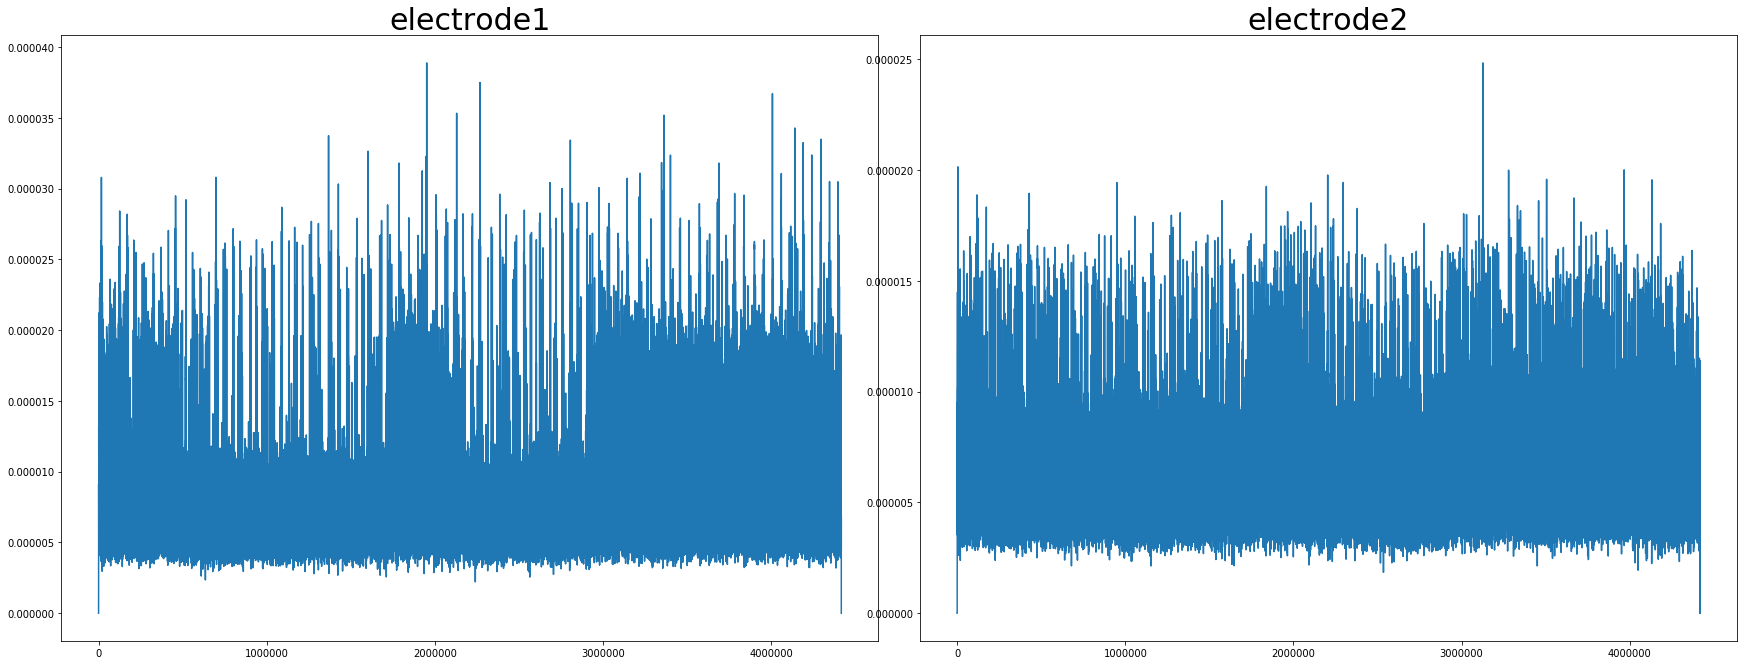

In [13]:
def smoothing(squares,window_size=48):
    
    N=window_size
    smooth=np.zeros((squares.shape[0]))
    for i in range(N//2,(squares.shape[0]-(N//2))):
        
        sum=0
        for j in range (i-(N//2), i+(N//2)):
            
            sum=sum+squares[j]
        smooth[i]=(1/N)*sum
    return smooth

electrode1Smooth= smoothing(electrode1Abs,48)
electrode2Smooth=  smoothing(electrode2Abs,48)
print(electrode1Smooth.shape)
f3, (ax5,ax6)=plt.subplots(1,2,figsize=(24,9))
f3.tight_layout()

ax5.plot(x_values,electrode1Smooth)
ax5.set_title('electrode1',fontsize=30)

ax6.plot(x_values,electrode2Smooth)
ax6.set_title('electrode2',fontsize=30)


In [14]:
#Saving in file trial
np.save('electrode1Smooth.txt', electrode1Smooth)
np.save('electrode2Smooth.txt', electrode2Smooth)

In [15]:



#YOMNA YOU DON'T HAVE TO DO ANY OF THE PREVIOUS PROCESSING JUST IMPORT AND JUMP HERE
electrode1Smooth=np.load('/media/yomnaj/New Volume/Bio_Assignment_2/electrode1Smooth.txt.npy')
electrode2Smooth=np.load('/media/yomnaj/New Volume/Bio_Assignment_2/electrode2Smooth.txt.npy')

In [31]:
# sd1 = np.std(electrode1Smooth[:500])
# sd2 = np.std(electrode2Smooth[:500])
# print('SD',sd1,sd2)

# thresh1, thresh2=sd1*3.5 ,sd2*3.5
# print('THRESHOLDS ',thresh1, thresh2)

SD 1.67415831177e-06 1.77829166523e-06
THRESHOLDS  5.85955409118e-06 6.22402082831e-06


In [16]:
#Function to get the peaks, the peaks' index and the whole spikes
def getSpikes(electrodeAbs , electrode,thresh , noSamples=48):
    
    spikes=[]
    peaksss=[]
    peaksssIndex=[]
        
    for i in range(0,len(electrode)-noSamples, noSamples):
        
        peak= max(electrode[i:i+noSamples])
        peakDown= min(electrode[i:i+noSamples])
        #print(peak)
        
        if peak > thresh: 
            peaksss.append(peak)
            #print('YES BIGGER THAN THRESH')
            print(peak,np.argwhere(electrode[i:i+noSamples]== peak))
            peakIndex=np.argwhere(electrode[i:i+noSamples]== peak)
            print('IM THE INDEX',peakIndex)
            peakIndex[0][0]+=i
            peaksssIndex.append(peakIndex[0][0])

            #print('I AM PEAK INDEXXXXXXX ', peakIndex,peakIndex[0][0])
            #np.append(spikes,electrode[peakIndex[0][0]-noSamples//2,peakIndex[0][0]+noSamples//2])
            #print(spikes)
            #print(electrode[(29-noSamples//2):(29+noSamples//2)])
            spikes.append(electrode[(peakIndex[0][0]-noSamples//2):(peakIndex[0][0]+noSamples//2)])
        elif  peakDown < (-1*thresh):
            
            peaksss.append(peakDown)
            peakIndex=np.where(electrode[i:i+noSamples]== peakDown)
            peakIndex[0][0]+=i
            peaksssIndex.append(peakIndex[0][0])

            

            
        else:
            pass
    return np.array([spikes]), np.array([peaksss]), np.array([peaksssIndex])




            
        
spikes,peaksss, peaksssIndex=getSpikes (electrode1,electrode1, thresh1)
print('NUMBER OF SPIKES',spikes[1:].shape)
# for i in range(spikes.shape[0]):
#     spikes[0][i]= tuple(spikes[0][i])
#print(spikes[0])
# print(len(spikes[0][1]))
# print(len(spikes[0][2]))
# spikes=np.array(spikes[0][1:])
# print(spikes.shape)
# print(spikes)


3.7131e-05 []
IM THE INDEX []


IndexError: index 0 is out of bounds for axis 0 with size 0

In [71]:
#Saving in file trial
np.save('electrode1thresh35spikes.txt', spikes)
np.save('electrode1thresh35peaksss.txt', peaksss)
np.save('electrode1thresh35peaksssIndex.txt', peaksssIndex)

In [19]:



#YOMNA YOU DON'T HAVE TO DO ANY OF THE PREVIOUS PROCESSING JUST IMPORT AND JUMP HERE




spikes=np.load('/media/yomnaj/New Volume/Bio_Assignment_2/electrode1thresh35spikes.txt.npy')


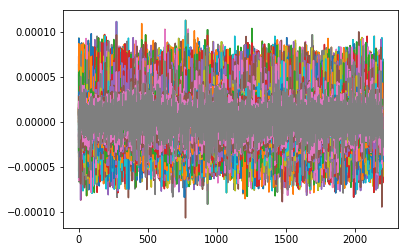

In [20]:

#i=0
for x in spikes:


    plt.plot(x)
#     print(i)
#     i+=1
#     if i >= 3:
#     	break

plt.show()

In [ ]:
#NOW LET'S START WITH THE PCA
